#### Análisis de imágenes

Se va a analizar la imagen de la Vesícula.

In [39]:
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Populating the interactive namespace from numpy and matplotlib


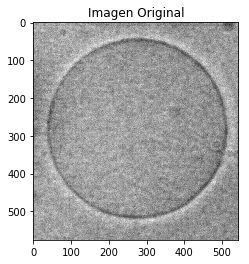

In [40]:
Im1 = pylab.imread("ves_full_150_002.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()

In [41]:
image_gray = color.rgb2gray(Im1)
edges = canny(image_gray, sigma=3.789)

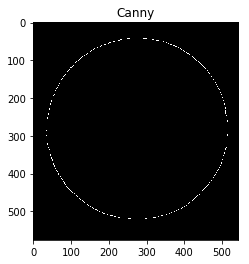

In [42]:
pylab.imshow(edges, cmap = cm.Greys_r)
plt.title('Canny', fontsize=12)
pylab.gray()

In [43]:
hough_radii = np.arange(200, 260, 2)
hough_res = hough_circle(edges, hough_radii)


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (1352,)

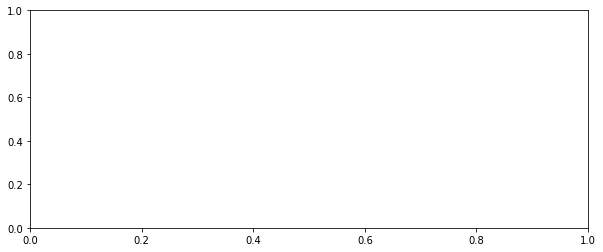

In [46]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image_gray)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image_gray[circy, circx] = (220, 20, 20)

ax.imshow(image_gray, cmap=plt.cm.gray)
plt.show()